<a href="https://colab.research.google.com/github/GustavoTeodoro10/desafioAllureStore/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
def somaFaturamento (nome,preco):
  totalVenda=0
  for p in preco:
    totalVenda += p

  print(f'O fatuamento total da {nome} é de R$ {totalVenda:,.2f} !'.replace('.', ',').replace(',', '.', 2))
  return totalVenda



In [3]:
nomeLoja1 = '1º Loja'
varLoja1 = somaFaturamento(nomeLoja1,loja['Preço'])

nomeLoja2 = '2º Loja'
varLoja2 = somaFaturamento(nomeLoja2,loja2['Preço'])

nomeLoja3 = '3º Loja'
varLoja3 = somaFaturamento(nomeLoja3,loja3['Preço'])

nomeLoja4 = '4º Loja'
varLoja4 = somaFaturamento(nomeLoja4,loja4['Preço'])






O fatuamento total da 1º Loja é de R$ 1.534.509,12 !
O fatuamento total da 2º Loja é de R$ 1.488.459,06 !
O fatuamento total da 3º Loja é de R$ 1.464.025,03 !
O fatuamento total da 4º Loja é de R$ 1.384.497,58 !


# 2. Vendas por Categoria


In [4]:
todasLojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

todasLojas.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [5]:
vendaCategoria = todasLojas.groupby('Categoria do Produto')['Preço'].sum()
print(vendaCategoria)

Categoria do Produto
brinquedos                 98140.86
eletrodomesticos         1766337.03
eletronicos              2214099.72
esporte e lazer           190635.39
instrumentos musicais     465029.67
livros                     50260.74
moveis                   1010214.00
utilidades domesticas      76773.38
Name: Preço, dtype: float64


# 3. Média de Avaliação das Lojas

In [6]:
def medAvaliacao(loja,avaliacao):

  media = sum(avaliacao)/len(avaliacao)
  print(f'A media das avaliações da {loja} é de {media:,.2f} pontos !')
  return media


In [7]:
varLoja1 = medAvaliacao(nomeLoja1,loja['Avaliação da compra'])

varLoja2 = medAvaliacao(nomeLoja2,loja2['Avaliação da compra'])

varLoja3 = medAvaliacao(nomeLoja3,loja3['Avaliação da compra'])

varLoja4 = medAvaliacao(nomeLoja4,loja4['Avaliação da compra'])

A media das avaliações da 1º Loja é de 3.98 pontos !
A media das avaliações da 2º Loja é de 4.04 pontos !
A media das avaliações da 3º Loja é de 4.05 pontos !
A media das avaliações da 4º Loja é de 4.00 pontos !


# 4. Produtos Mais e Menos Vendidos

In [14]:
def produtoVendido(dc,nome):
  vendasPorProduto = dc.groupby('Produto').size().reset_index(name='Total Vendido')

  maisVendido = vendasPorProduto.sort_values('Total Vendido',ascending = False).head(1)
  menosVendido = vendasPorProduto.sort_values('Total Vendido',ascending = True).head(1)

  maisVendido = maisVendido['Produto'].iloc[0]
  menosVendido = menosVendido['Produto'].iloc[0]

  print(f'Da {nome} o produto mais vendido é o(a) {maisVendido} e o(a) menos vendido é {menosVendido}')
  return maisVendido, menosVendido


In [16]:

varLoja1 = produtoVendido(loja,nomeLoja1)
varLoja2 = produtoVendido(loja2,nomeLoja2)
varLoja3 = produtoVendido(loja3,nomeLoja3)
varLoja4 = produtoVendido(loja4,nomeLoja4)

Da 1º Loja o produto mais vendido é o(a) TV Led UHD 4K e o(a) menos vendido é Celular ABXY
Da 2º Loja o produto mais vendido é o(a) Iniciando em programação e o(a) menos vendido é Jogo de tabuleiro
Da 3º Loja o produto mais vendido é o(a) Kit banquetas e o(a) menos vendido é Blocos de montar
Da 4º Loja o produto mais vendido é o(a) Cama box e o(a) menos vendido é Guitarra


# 5. Frete Médio por Loja


In [8]:
def medFrete(loja,frete):

  media = sum(frete)/len(frete)
  print(f'O custo medio de frete da {loja} é de R${media:,.2f} !')
  return media

In [9]:
varLoja1 = medFrete(nomeLoja1,loja['Frete'])

varLoja2 = medFrete(nomeLoja2,loja2['Frete'])

varLoja3 = medFrete(nomeLoja3,loja3['Frete'])

varLoja4 = medFrete(nomeLoja4,loja4['Frete'])



O custo medio de frete da 1º Loja é de R$34.69 !
O custo medio de frete da 2º Loja é de R$33.62 !
O custo medio de frete da 3º Loja é de R$33.07 !
O custo medio de frete da 4º Loja é de R$31.28 !


# Graficos

In [17]:
import matplotlib.pyplot as plt


O fatuamento total da 1º Loja é de R$ 1.534.509,12 !
O fatuamento total da 2º Loja é de R$ 1.488.459,06 !
O fatuamento total da 3º Loja é de R$ 1.464.025,03 !
O fatuamento total da 4º Loja é de R$ 1.384.497,58 !


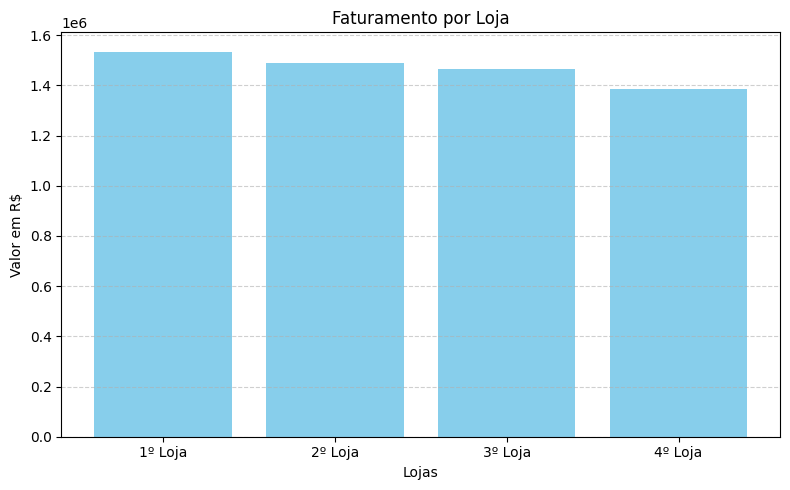

In [18]:
lojas = ['1º Loja', '2º Loja', '3º Loja', '4º Loja']
faturamentos = [
    somaFaturamento(nomeLoja1, loja['Preço']),
    somaFaturamento(nomeLoja2, loja2['Preço']),
    somaFaturamento(nomeLoja3, loja3['Preço']),
    somaFaturamento(nomeLoja4, loja4['Preço'])
]

plt.figure(figsize=(8,5))
plt.bar(lojas, faturamentos, color='skyblue')
plt.title('Faturamento por Loja')
plt.ylabel('Valor em R$')
plt.xlabel('Lojas')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

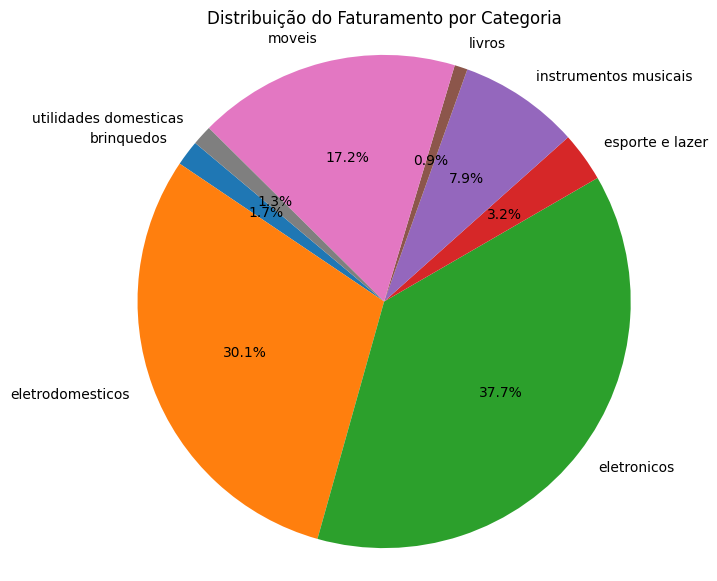

In [19]:
vendaCategoria = todasLojas.groupby('Categoria do Produto')['Preço'].sum()

plt.figure(figsize=(7,7))
plt.pie(vendaCategoria, labels=vendaCategoria.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição do Faturamento por Categoria')
plt.axis('equal')  # deixa o gráfico redondinho
plt.show()

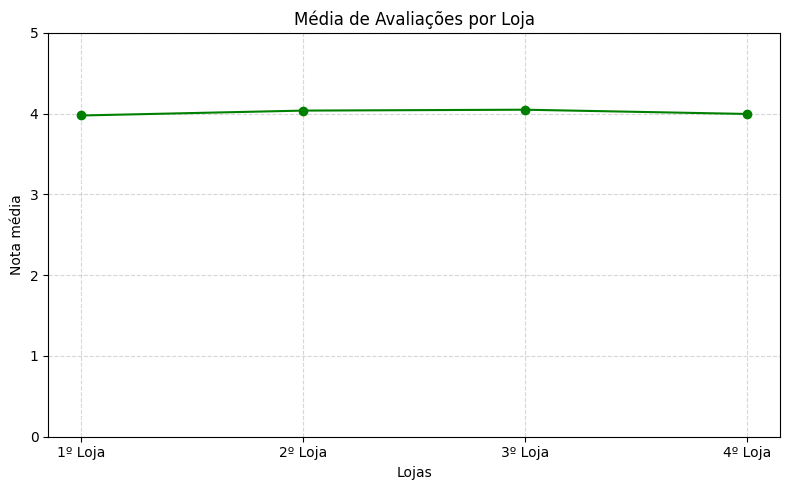

In [20]:
avaliacoes = [
    loja['Avaliação da compra'].mean(),
    loja2['Avaliação da compra'].mean(),
    loja3['Avaliação da compra'].mean(),
    loja4['Avaliação da compra'].mean()
]

plt.figure(figsize=(8,5))
plt.plot(lojas, avaliacoes, marker='o', color='green')
plt.title('Média de Avaliações por Loja')
plt.ylabel('Nota média')
plt.xlabel('Lojas')
plt.ylim(0, 5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 📊 Relatório Final – Qual loja o Senhor João deve manter?


🔎 O que a gente fez?
Analisamos os dados das 4 lojas do Senhor João pra descobrir qual delas vale mais a pena manter e quais podem ser vendidas. Pra isso, olhamos:


*   Quanto cada loja faturou

*   Quais categorias venderam mais

*   Como os clientes avaliaram cada loja

*   Quais produtos foram os mais e menos vendidos

*   E quanto custa, em média, o frete de cada uma



💰 Faturamento
Mais faturou: 1º Loja com R$ 1.534.509,12

Menos faturou: 4º Loja com R$ 1.384.497,58


---


📦 Categoria dos Produtos
A categoria com maior número de vendas foi:

Eletrônicos com 37,7% das vendas


---


🌟 Avaliações dos Clientes
Melhor avaliação média: 3º Loja com 4,05 pontos


---


🏆 Produtos em Destaque

Loja	Produto Mais Vendido	Produto Menos Vendido
*   1º Loja	TV Led UHD 4K	Celular ABXY
*   2º Loja	Iniciando em programação	Jogo de tabuleiro
*   3º Loja	Kit banquetas	Blocos de montar
*   4º Loja	Cama box	Guitarra


---


🚚 Frete Médio
Frete mais barato: 4º Loja com R$ 31,28

##✅ Conclusão

Com base nos dados analisados:

A **1º Loja** se destacou pelo **maior faturamento**.

A 3**º Loja** teve a melhor **média de avaliação** dos clientes.

A **4º Loja** ofereceu o **frete mais barato**, mesmo sendo a que menos faturou.

Apesar do bom desempenho de cada loja em diferentes aspectos, a **1º Loja** apresenta o melhor equilíbrio entre **vendas totais e produtos de alto giro**, o que mostra maior potencial financeiro.
Portanto, **a recomendação é manter a 1º Loja** e considerar a venda das demais.